In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Thresholding
Thresholding is a technique used to segment an image by comparing each pixel’s intensity against a specified threshold. Depending on the method, pixels are either modified or kept unchanged. There are various types of thresholding
1. Global Thresholding
2. Adaptive Thresholding
3. Otsu's Binarization


## Global Thresholding
1. **Binary Thresholding**
A threshold value T is chosen. If a pixel intensity > T, it is set to 1 (or 255 in images). If a pixel intensity ≤ T, it is set to 0.
2. **Binary Thresholding (Inverse)**
This is the opposite of binary thresholding. If a pixel intensity > T, it becomes 0. If a pixel intensity ≤ T, it becomes 1 (or 255).
3. **Truncate Thresholding**
Works like maximum clipping. If a pixel intensity > T, it is set to T. If a pixel intensity ≤ T, it remains unchanged.
4. **To Zero Thresholding**
If a pixel intensity ≤ T, it is set to 0. If a pixel intensity > T, it remains unchanged.
5. **To Zero Thresholding (Inverse)**
This is the reverse of the above. If a pixel intensity ≤ T, it remains unchanged. If a pixel intensity > T, it is set to 0.

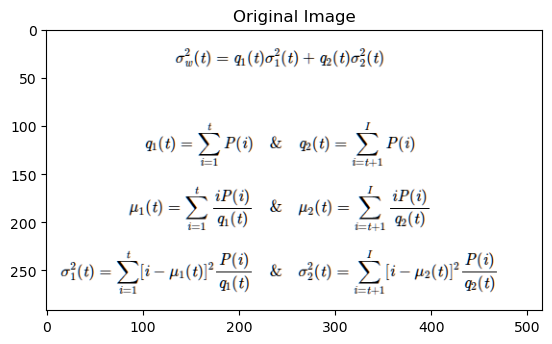

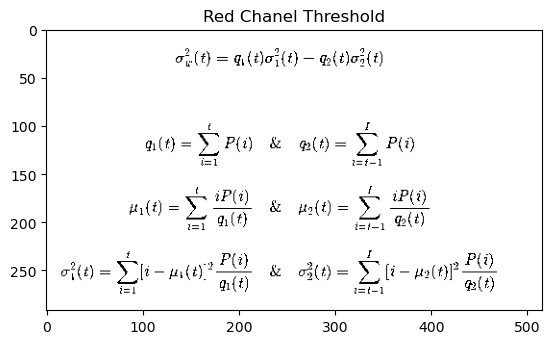

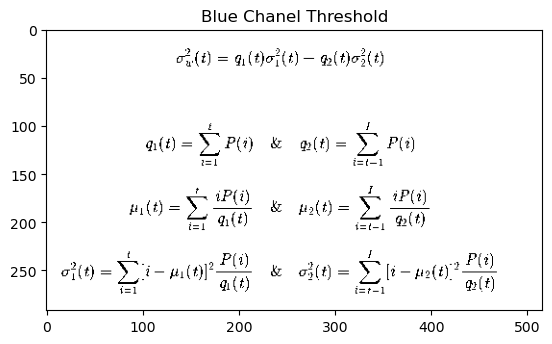

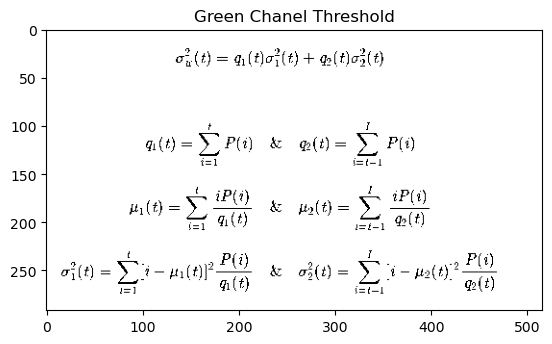

In [72]:
plt.imshow(bgr_img)
plt.title("Original Image")
plt.show()

# Get the pixel values where the Red Chanel has more than 127 pixel intensity
ret, thres_img = cv2.threshold(bgr_img[:,:,0], 127, 255, cv2.THRESH_BINARY)
# ret - Threshold Value; 127 - Threshold Value; 255 - Maximum Value
plt.imshow(thres_img, cmap = "gray")
plt.title("Red Chanel Threshold")
plt.show()

# Get the pixel values where the Blue Chanel has more than 127 pixel intensity
ret, thres_img = cv2.threshold(bgr_img[:,:,2], 127, 255, cv2.THRESH_BINARY)
plt.imshow(thres_img, cmap = "gray")
plt.title("Blue Chanel Threshold")
plt.show()

# Get the pixel values where the Green Chanel has more than 127 pixel intensity
ret, thres_img = cv2.threshold(bgr_img[:,:,1], 127, 255, cv2.THRESH_BINARY)
plt.imshow(thres_img, cmap = "gray")
plt.title("Green Chanel Threshold")
plt.show()

## Adaptive Thresholding
Here Rather than operaing pixel by pixel using a single threshold value for the whole image, patches of the image will be considered and a threshold value will be determined based on the neighbours. This method will be useful if we are having extremely different lighting conditions where one threshold value will not give good results. There are 2 ways to calculate the threshold
1. **Mean**
Given the Neighbour Kernel Size, the mean of all neighbour pixel intensities will be the new threshold value.
2. **Gaussian**
Given the Neighbour Kernel Size, the weighted mean of all neighbour pixel intensities will be the new threshold value.'

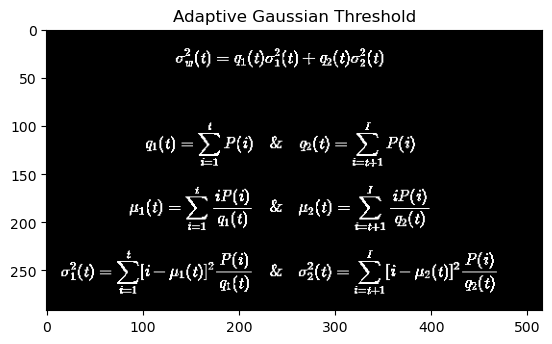

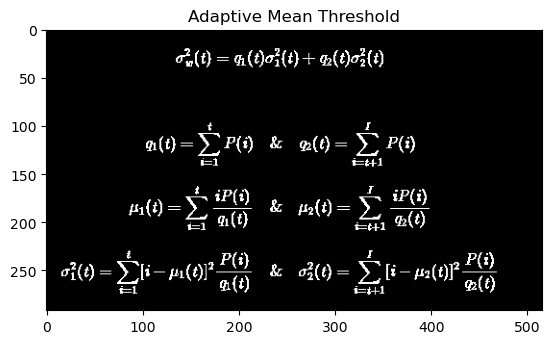

In [76]:
gaussian_thres_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(gaussian_thres_img, cmap = "gray")
plt.title("Adaptive Gaussian Threshold")
plt.show()

mean_thres_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(mean_thres_img, cmap = "gray")
plt.title("Adaptive Mean Threshold")
plt.show()

## Otsu’s Binarization
This method will automatically find the Threshold value rather than us providing with one. 
### Method for Calculation of the Threshold
1. Convert the image into histogram
2. Compute the Within Class Variance
    1. Compute the cummulative probability of pixels where intensity < T and for pixels with intensities > T
    2. Compute the Average/Mean Probability
    3. Compute the variance for each class.
3. If the Within Class Variance is small then that means the 2 classes are separate and are tight

![alt text](images/otsu_equations.png)

Here We are considering the probability as the weight because there is a possibility that a very small object with low variance will influence the final value. But, ,if we use probability as a weight then the impact of that low variance object will be minimized.

169.0


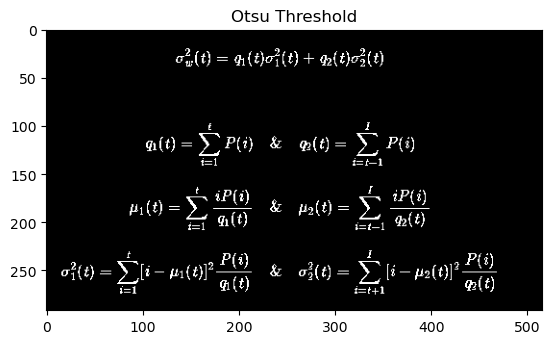

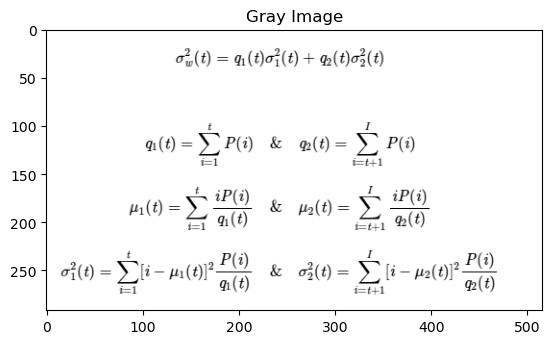

In [75]:
ret, otsu_thres_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(ret)
plt.imshow(otsu_thres_img, cmap = "gray")
plt.title("Otsu Threshold")
plt.show()

plt.imshow(gray_img, cmap = "gray")
plt.title("Gray Image")
plt.show()